## 学んだこと / 所感

- `ndarray > condition` で `True/False` の `array` が返ってくる。知らなかったが便利そう。
- 0以外の値をカウントするときは[numpy.count_nonzero](https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html)を使う。
- `sns.histplot` の返り値は `matplotlib.axes.Axes` なので、`matplotlib.axes.Axes.set_xticks` 等で細かい調整ができる。

In [74]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [75]:
# 1.1

x = np.array([
    47,61,77,74,60,
    43,63,50,82,62,
    67,58,55,86,66,
    54,52,69,66,78
])

class_value = [44.5, 55.5, 65.5, 75.5, 85.5]
class_boudaries = ['39.5 - 49.5','49.5 - 59.5','59.5 - 69.5', '69.5 - 79.5', '79.5 - 89.5']
freq_table = pd.DataFrame({'class': class_value, 'class_boundaries': class_boudaries})
freq_table

,class,class_boundaries
0,44.5,39.5 - 49.5
1,55.5,49.5 - 59.5
2,65.5,59.5 - 69.5
3,75.5,69.5 - 79.5
4,85.5,79.5 - 89.5


In [76]:
# 度数
first_freq = np.count_nonzero((39.5 < x) & (x < 49.5))
second_freq  = np.count_nonzero((49.5 < x) & (x < 59.5))
third_freq  = np.count_nonzero((59.5 < x) & (x < 69.5))
fourth_freq  = np.count_nonzero((69.5 < x) & (x < 79.5))
fifth_freq  = np.count_nonzero((79.5 < x) & (x < 89.5))
freq_table['freq'] = [first_freq, second_freq, third_freq, fourth_freq, fifth_freq]

# 相対度数
len_x = len(x)
r_first_freq = first_freq / len_x
r_second_freq = second_freq / len_x
r_third_freq = third_freq / len_x
r_fourth_freq = fourth_freq / len_x
r_fifth_freq = fifth_freq/ len_x
freq_table['r_freq'] = [r_fifth_freq, r_second_freq, r_third_freq, r_fourth_freq, r_fifth_freq]

# 累積度数
c_first_freq = first_freq
c_second_freq = first_freq + second_freq
c_third_freq = c_second_freq + third_freq
c_fourth_freq = c_third_freq + fourth_freq
c_fifth_freq = c_fourth_freq + fifth_freq
freq_table['c_freq'] = [c_first_freq, c_second_freq, c_third_freq, c_fourth_freq, c_fifth_freq]

# 累積相対度数
cr_first_freq = r_first_freq
cr_second_freq = r_first_freq + r_second_freq
cr_third_freq = cr_second_freq + r_third_freq
cr_fourth_freq = cr_third_freq + r_fourth_freq
cr_fifth_freq = cr_fourth_freq + r_fifth_freq
freq_table['cr_freq'] = [cr_first_freq, cr_second_freq, cr_third_freq, cr_fourth_freq, cr_fifth_freq]

freq_table

,class,class_boundaries,freq,r_freq,c_freq,cr_freq
0,44.5,39.5 - 49.5,2,0.10,2,0.10
1,55.5,49.5 - 59.5,5,0.25,7,0.35
2,65.5,59.5 - 69.5,8,0.40,15,0.75
3,75.5,69.5 - 79.5,3,0.15,18,0.90
4,85.5,79.5 - 89.5,2,0.10,20,1.00


<AxesSubplot:xlabel='weight', ylabel='Count'>

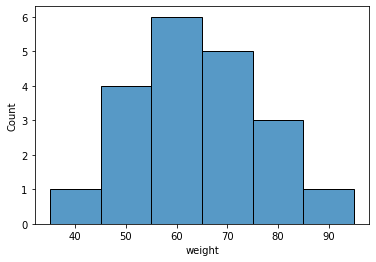

In [77]:
sns.histplot(pd.DataFrame({'weight': x}), x='weight', binwidth=10, binrange=(35, 95))

In [78]:
## 1.2

x = np.array([
    2, -15, 3, 6, -1,
    -2, 5, 8, 13, -19,
    1, -5, -7, 18, 10,
    14, -3, 10, 4, -9
])

In [79]:
# ref: https://qiita.com/TakuTaku36/items/91032625e482f2ae6e18
def Frequency_Distribution(data, class_width=None, min_value=None):
    data = np.asarray(data)
    if class_width is None:
        class_size = int(np.log2(data.size).round()) + 1
        class_width = round((data.max() - data.min()) / class_size)
    if min_value is None:
        min_value = data.min()

    bins = np.arange(min_value, data.max()+class_width+1, class_width)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame({
        '階級値': (bins[1:] + bins[:-1]) / 2,
        '度数': hist,
        '累積度数': cumsum,
        '相対度数': hist / cumsum[-1],
        '累積相対度数': cumsum / cumsum[-1]},
        index = pd.Index([f'{round(bins[i], 2)}以上{round(bins[i+1], 2)}未満' for i in range(hist.size)], name='階級')
    )

Frequency_Distribution(x, class_width=8, min_value=-20.5)

,階級値,度数,累積度数,相対度数,累積相対度数
階級,,,,,
-20.5以上-12.5未満,-16.5,2,2,0.10,0.10
-12.5以上-4.5未満,-8.5,3,5,0.15,0.25
-4.5以上3.5未満,-0.5,6,11,0.30,0.55
3.5以上11.5未満,7.5,6,17,0.30,0.85
11.5以上19.5未満,15.5,3,20,0.15,1.00


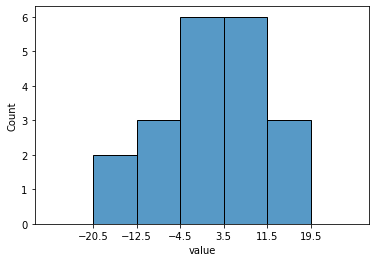

In [80]:
axes = sns.histplot(pd.DataFrame({'value': x}), x='value', binrange=(-28.5, 27.5), binwidth=8)
# ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks
axes.set_xticks([-20.5, -12.5, -4.5, 3.5, 11.5, 19.5])

In [84]:
# 1.3
x = np.array([
    2.8, -0.1, -2.6, 1.3, 1.6, 1.6, -0.8, -4.0, -1.5, 0.6, -3.9, 1.0,
    -4.2, -0.5, -5.9, 1.7, 1.6, 2.7, -0.1, 2.3, -2.3, -6.0, -3.5, -5.7,
    -1.0, 2.3, 5.8, 1.2, -2.7, 0.2, -2.1, 0.4, -3.5, -1.3, -1.2, 0.4
])

Frequency_Distribution(x, class_width=2, min_value=-10.05)

,階級値,度数,累積度数,相対度数,累積相対度数
階級,,,,,
-10.05以上-8.05未満,-9.05,0,0,0.000000,0.000000
-8.05以上-6.05未満,-7.05,0,0,0.000000,0.000000
-6.05以上-4.05未満,-5.05,4,4,0.111111,0.111111
-4.05以上-2.05未満,-3.05,8,12,0.222222,0.333333
-2.05以上-0.05未満,-1.05,8,20,0.222222,0.555556
-0.05以上1.95未満,0.95,11,31,0.305556,0.861111
1.95以上3.95未満,2.95,4,35,0.111111,0.972222
3.95以上5.95未満,4.95,1,36,0.027778,1.000000
5.95以上7.95未満,6.95,0,36,0.000000,1.000000


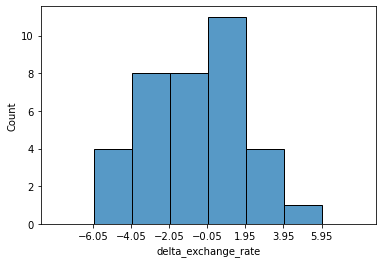

In [89]:
axes = sns.histplot(pd.DataFrame({'delta_exchange_rate': x}), x='delta_exchange_rate', binwidth=2, binrange=(-8, 8))
axes.set_xticks([-6.05, -4.05, -2.05, -0.05, 1.95, 3.95, 5.95])

In [92]:
# 1.4

freq = np.array([
    137, 1143, 1435, 884, 392, 153
])

freq_total = np.sum(freq)

# 階級値

class_values = np.array([125, 375, 625, 875, 1115, 1375])

# 相対度数
r_freq = [round(each_freq / freq_total, 3) for each_freq in freq]

# 累積度数
c_freq = freq.cumsum().tolist()

# 累積相対度数
cr_freq = [round(each_cr_freq, 3) for each_cr_freq in np.array(r_freq).cumsum()]

print(f'階級値: {class_values}\n相対度数: {r_freq}\n累積度数: {c_freq}\n累積相対度数: {cr_freq}')

階級値: [ 125  375  625  875 1115 1375]
相対度数: [0.033, 0.276, 0.346, 0.213, 0.095, 0.037]
累積度数: [137, 1280, 2715, 3599, 3991, 4144]
累積相対度数: [0.033, 0.309, 0.655, 0.868, 0.963, 1.0]


<AxesSubplot:xlabel='salary', ylabel='freq'>

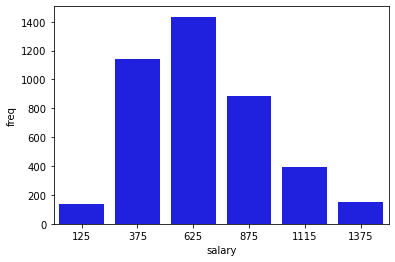

In [104]:
axes = sns.barplot(x='salary', y='freq', data=pd.DataFrame({'salary': class_values, 'freq': freq}), color='blue')
axes